# Surnjani Djoko May 13th 2022
## Apply optimized hyparameters from subsample (50K) training dataset, to build a model for the entire training dataset
## (a) Ran at local machine with 25 topics
## (2) Ran at local machine with 20 topics
## (3) Ran at AWS EC2 with 25 topics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)  

In [3]:
# load back the entire training corpus and dictionary
DICT_PATH="full_sample/id2word_50k_filtered_full"
CORPUS_PATH="full_sample/corpus_50k_filtered_full"
    
id2word = corpora.Dictionary.load(DICT_PATH)
corpus = corpora.MmCorpus(CORPUS_PATH)

# (1) Model with 25 topics

In [6]:
# the hyperparameters below were chosen based on the hyperparameter tunings obtained from subsample runs ....
lda_model_opt = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=25, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=20,
                                           alpha='asymmetric',
                                           eta='symmetric')

In [7]:
import pickle

with open('full_sample/lda_model_25.pk',"wb") as f:
    pickle.dump(lda_model_opt, f)

## Evaluate training dataset based on the 25 topics' model

In [9]:
with open("full_sample/trigram_tokens_data_full", "rb") as fp:   # Unpickling
    token_words_trigrams_lemm = pickle.load(fp)

In [11]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_opt, texts=token_words_trigrams_lemm, 
                                         dictionary=id2word, coherence='c_v')
    
cv_opt = coherence_model_lda.get_coherence()

cv_opt

0.5239215000358146

In [12]:
# Compute Perplexity: a measure of how successfully a trained topic model predicts new data
print('\nPerplexity: ', lda_model_opt.log_perplexity(corpus))  
# a measure of how good the model is, lower the better.


Perplexity:  -8.406150720937427


In [7]:
with open('full_sample/lda_model_25.pk', 'rb') as pickle_file:
    bestModel_25 = pickle.load(pickle_file)

In [8]:
def plot_topics(bestModel, num_topics, rows, cols, num_words):
    topics = bestModel.show_topics(num_topics=25, num_words=5, formatted=False)
    topics = sorted(topics, key=lambda x: int(x[0]))
    fig, axs = plt.subplots(nrows=rows, ncols=cols, sharex=True, figsize=(14, 10))
    for topic_id, word_props in topics:
        row = topic_id // cols
        col = topic_id - (row * cols)
    
        ax = axs[row, col]
        words, probs = zip(*word_props)
        ax.barh(words, probs)
        ax.invert_yaxis()
        ax.set_title('Topic {}'.format(topic_id))

    plt.tight_layout()
    plt.show()

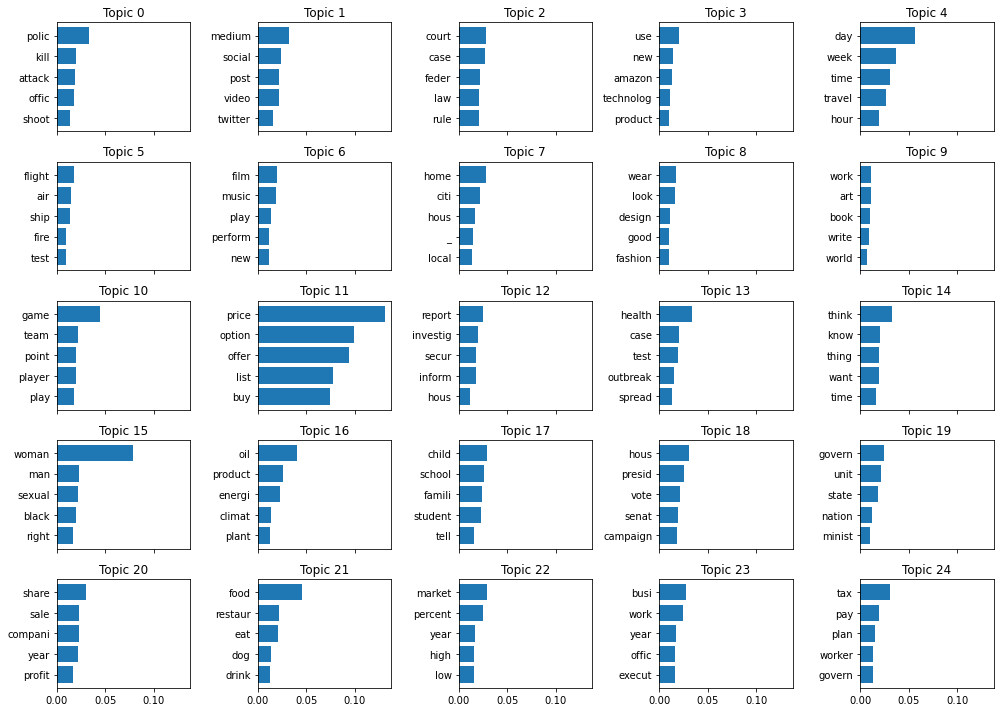

In [11]:
num_topics=25
rows = 5
cols = 5
num_words = 5
plot_topics(bestModel_25, num_topics, rows, cols, num_words)

In [16]:
from pprint import pprint
def print_topics(bestModel, num_topics):
    for i in range(num_topics):
        print('Topic number', i)
        pprint(bestModel.show_topic(i, topn=15))
        print('\n')

In [17]:
print_topics(bestModel_25, 25)

Topic number 0
[('polic', 0.033206142),
 ('kill', 0.019399807),
 ('attack', 0.018491102),
 ('offic', 0.017574709),
 ('shoot', 0.013846522),
 ('death', 0.012086386),
 ('report', 0.011993651),
 ('man', 0.011807147),
 ('protest', 0.010824574),
 ('tell', 0.010535442),
 ('arrest', 0.010045838),
 ('gun', 0.008650407),
 ('peopl', 0.008521285),
 ('crime', 0.0068370053),
 ('murder', 0.0066459225)]


Topic number 1
[('medium', 0.032342467),
 ('social', 0.023551296),
 ('post', 0.021658557),
 ('video', 0.021544073),
 ('twitter', 0.015912933),
 ('facebook', 0.015806418),
 ('news', 0.014605139),
 ('ad', 0.013169001),
 ('user', 0.011236461),
 ('platform', 0.010425196),
 ('use', 0.010406608),
 ('comment', 0.010389956),
 ('stori', 0.010156284),
 ('content', 0.010094344),
 ('internet', 0.009803359)]


Topic number 2
[('court', 0.028727023),
 ('case', 0.027314795),
 ('feder', 0.0219471),
 ('law', 0.021345444),
 ('rule', 0.021013595),
 ('state', 0.019610785),
 ('order', 0.017560778),
 ('trial', 0.01701439

In [ ]:
topic_des_dict = {
"Topic number": ['Topic 0',
'Topic 1',
'Topic 2',
'Topic 3',
'Topic 4',
'Topic 5',
'Topic 7',
'Topic 8',
'Topic 9',
'Topic 10',
'Topic 11',
'Topic 12',
'Topic 13',
'Topic 14',
'Topic 15',
'Topic 16',
'Topic 17',
'Topic 18',
'Topic 19',
'Topic 20',
'Topic 21',
'Topic 23',
'Topic 24'],
    
"Topic description": ['politic, attack and crime',
'social media and platform',
'Legal and immigrant issuew',
'technology related such as product, company',
'time, meeting, travel',
'natural and man made disastor and issues, including air and land',
'location, housing/building issues',
'fashion and branding',
'history, art and education',
'sport, game, team, player',
'stock market',
'russion related ......',
'health, drug, disease, viru and outbreak',
'people action in general .....',
'gender and race related issues',
'energy and climate issues',
'domestic issues, daily living and family',
'US politic, bill, compaign, government personal',
'Non US politic/country/security',
'Economic, companies revenue, market, etc.',
'food, bar, restaurant',
'work related such as role, company, etc.',
'funding and taxing with government'],

    # TO BE UPDATED with sme's names
"SME" : [
'Topic 0',
'Topic 1',
'Topic 2',
'Topic 3',
'Topic 4',
'Topic 5',
'Topic 7',
'Topic 8',
'Topic 9',
'Topic 10',
'Topic 11',
'Topic 12',
'Topic 13',
'Topic 14',
'Topic 15',
'Topic 16',
'Topic 17',
'Topic 18',
'Topic 19',
'Topic 20',
'Topic 21',
'Topic 23',
'Topic 24']
}
    
topic_des_pd = pd.DataFrame(topic_des_dict)

# (2) Remodel with 20 topics 

In [5]:
# the hyperparameters below were chosen based on the hyperparameter tunings obtained from subsample runs ....
lda_model_opt_20 = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=20,
                                           alpha='asymmetric',
                                           eta='symmetric')

In [6]:
import pickle

with open('full_sample/lda_model_20.pk',"wb") as f:
    pickle.dump(lda_model_opt_20, f)

## Evaluate training dataset based on the 20 topics' model

In [7]:
import pickle

with open("full_sample/trigram_tokens_data_full", "rb") as fp:   # Unpickling
    token_words_trigrams_lemm = pickle.load(fp)

In [8]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model_opt_20, texts=token_words_trigrams_lemm, 
                                         dictionary=id2word, coherence='c_v')
    
cv_opt = coherence_model_lda.get_coherence()

cv_opt

0.5174840286699075

In [9]:
# Compute Perplexity: a measure of how successfully a trained topic model predicts new data
print('\nPerplexity: ', lda_model_opt_20.log_perplexity(corpus))  
# a measure of how good the model is, lower the better.


Perplexity:  -8.148212852032472


In [6]:
with open('full_sample/lda_model_20.pk', 'rb') as pickle_file:
    bestModel_20 = pickle.load(pickle_file)

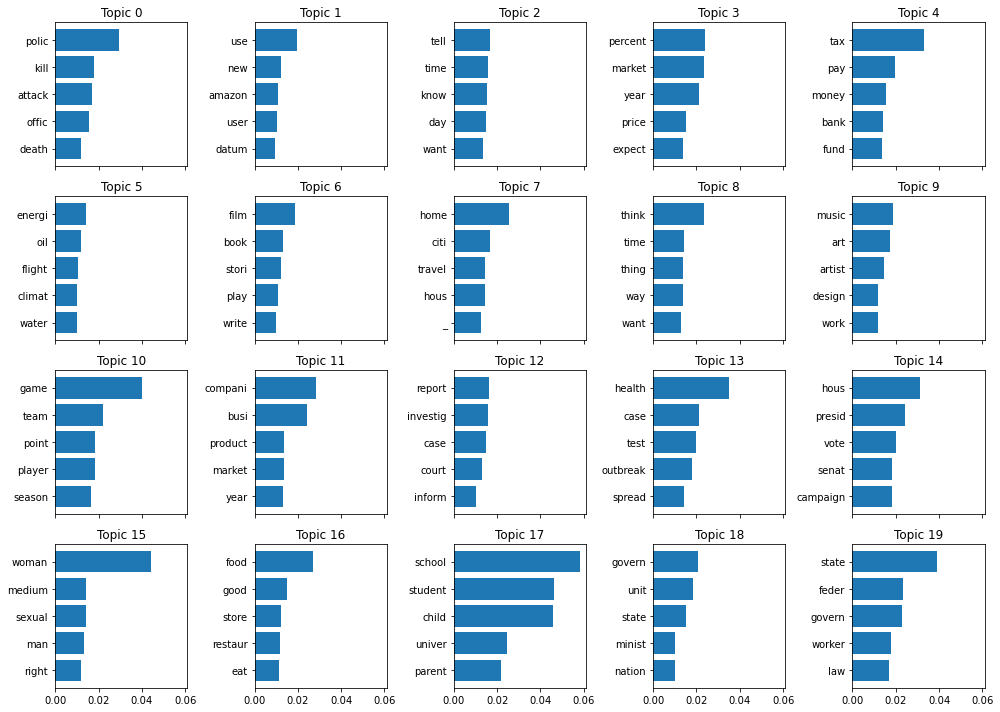

In [12]:
num_topics=20
rows = 4
cols = 5
num_words = 5
plot_topics(bestModel_20, num_topics, rows, cols, num_words)

In [18]:
print_topics(bestModel_20, 20)

Topic number 0
[('polic', 0.029536316),
 ('kill', 0.017818108),
 ('attack', 0.01710211),
 ('offic', 0.015508308),
 ('death', 0.012039324),
 ('shoot', 0.011922283),
 ('report', 0.011166359),
 ('man', 0.0098233605),
 ('arrest', 0.009727788),
 ('tell', 0.00947548),
 ('prison', 0.008994809),
 ('fire', 0.00836776),
 ('peopl', 0.008077667),
 ('protest', 0.0077763326),
 ('gun', 0.0075573535)]


Topic number 1
[('use', 0.019471154),
 ('new', 0.012206291),
 ('amazon', 0.011011559),
 ('user', 0.010440969),
 ('datum', 0.009531014),
 ('phone', 0.00873083),
 ('video', 0.008427445),
 ('platform', 0.007365236),
 ('devic', 0.0071497117),
 ('googl', 0.0070241448),
 ('internet', 0.006473771),
 ('facebook', 0.0062408634),
 ('ad', 0.006121262),
 ('tech', 0.006040838),
 ('network', 0.005826681)]


Topic number 2
[('tell', 0.016751619),
 ('time', 0.01578538),
 ('know', 0.015381893),
 ('day', 0.0146270385),
 ('want', 0.013386499),
 ('feel', 0.012481526),
 ('think', 0.010814339),
 ('friend', 0.0100170635),
 (

# (3) Evaluate model result from AWS run with 25 topics

In [13]:
aws_lda_model_25 = gensim.models.LdaMulticore.load('full_sample/AWS_model/default_model')

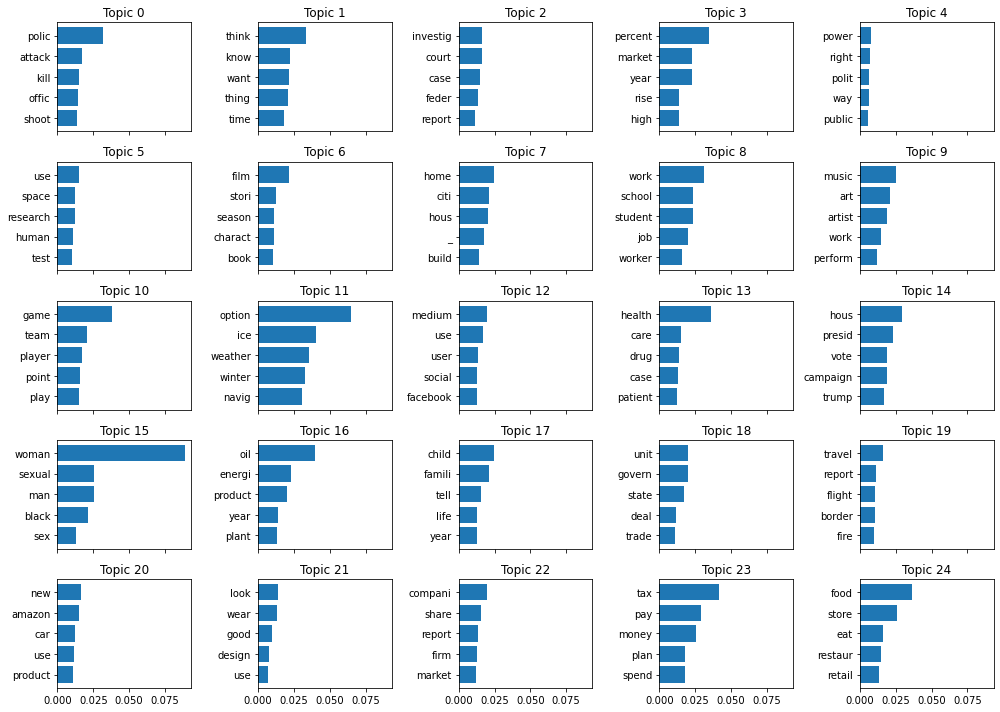

In [15]:
num_topics=25
rows = 5
cols = 5
num_words = 5
plot_topics(aws_lda_model_25, num_topics, rows, cols, num_words)

In [19]:
print_topics(aws_lda_model_25, 25)

Topic number 0
[('polic', 0.031807803),
 ('attack', 0.017330486),
 ('kill', 0.015027743),
 ('offic', 0.014076063),
 ('shoot', 0.01348002),
 ('protest', 0.013116305),
 ('arrest', 0.009374435),
 ('gun', 0.009340849),
 ('report', 0.008940319),
 ('man', 0.008586108),
 ('forc', 0.0085224025),
 ('group', 0.00804328),
 ('death', 0.0076142536),
 ('tell', 0.0068157017),
 ('peopl', 0.006794543)]


Topic number 1
[('think', 0.033763815),
 ('know', 0.02262149),
 ('want', 0.02134621),
 ('thing', 0.021225134),
 ('time', 0.017816113),
 ('feel', 0.015065667),
 ('tell', 0.01405196),
 ('come', 0.013356213),
 ('good', 0.013194387),
 ('way', 0.012936886),
 ('lot', 0.012415153),
 ('peopl', 0.01143853),
 ('look', 0.010421506),
 ('talk', 0.009576172),
 ('happen', 0.009359316)]


Topic number 2
[('investig', 0.01626385),
 ('court', 0.016249003),
 ('case', 0.015048117),
 ('feder', 0.013762076),
 ('report', 0.011473223),
 ('law', 0.011459814),
 ('state', 0.009747958),
 ('rule', 0.009527502),
 ('depart', 0.00936

In [14]:
import pickle

with open("full_sample/trigram_tokens_data_full", "rb") as fp:   # Unpickling
    token_words_trigrams_lemm = pickle.load(fp)

In [20]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=aws_lda_model_25, texts=token_words_trigrams_lemm, 
                                         dictionary=id2word, coherence='c_v')
    
cv_opt = coherence_model_lda.get_coherence()

cv_opt

0.515976401400922

In [21]:
# Compute Perplexity: a measure of how successfully a trained topic model predicts new data
print('\nPerplexity: ', aws_lda_model_25.log_perplexity(corpus))  
# a measure of how good the model is, lower the better.


Perplexity:  -7.745343514590157
